In [1]:
!pip install utility

  Preparing metadata (setup.py) ... done
  Created wheel for utility: filename=utility-1.0-py3-none-any.whl size=3807 sha256=306faf7fd43a212e84e1a95bbfeadd35c177a25f935b3d85774e7647e8c89af9
  Stored in directory: /root/.cache/pip/wheels/e5/f5/50/6624c9be2f958eca2fa2dc9fc635dedf9b1ec5b8ddbb46bb02
Successfully built utility


In [45]:
import sys
sys.path.append('../')
%matplotlib inline
import matplotlib.pyplot as plt
import cv2 as cv
import numpy as np
#from utility import util

# Изменим стандартный размер графиков matplotlib
plt.rcParams["figure.figsize"] = [6, 4]

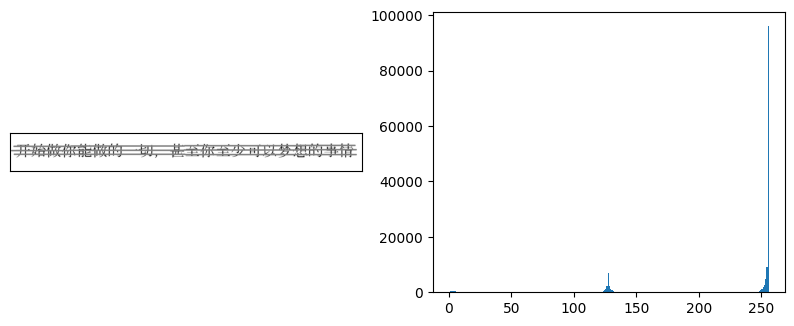

In [46]:
image = cv.imread('/content/translate.jpg')
rgb_image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
hsv_image = cv.cvtColor(image, cv.COLOR_BGR2HSV)
gray_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)


channels = [0]
histSize = [256]
range = [0, 256]

gs = plt.GridSpec(2, 2)
plt.figure(figsize=(10, 8))
plt.subplot(gs[0])
plt.imshow(gray_image, cmap='gray')
plt.xticks([]), plt.yticks([])
plt.subplot(gs[1])
plt.hist(gray_image.reshape(-1), 256, range)
plt.show()

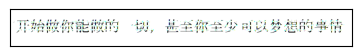

In [71]:
threshold = 121
ret1, thresh1 = cv.threshold(image, threshold, 255, cv.THRESH_BINARY)
images = [thresh1]

plt.figure(figsize=(15, 8))
for i in np.arange(len(images)):
    plt.subplot(1, 3, i + 1)
    plt.imshow(images[i], 'gray')
    plt.xticks([])
    plt.yticks([])
plt.show()

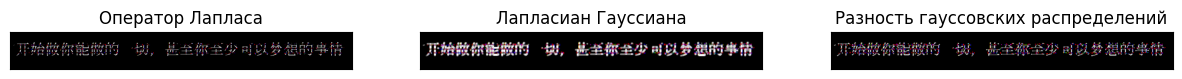

In [72]:
outImageDepth = cv.CV_16S  # глубина результирующего изображения.
#Т.к. входное изображение 8-битное,
#чтобы избежать переполнения сделаем выходное изображение 16-битное.

gaussian33 = cv.GaussianBlur(thresh1, (3, 3), 0)
gaussian55 = cv.GaussianBlur(thresh1, (5, 5), 0)

# применяем оператор Лапласа к тестовому изображению
laplace = cv.Laplacian(thresh1, outImageDepth, ksize=3)
# laplace = cv.convertScaleAbs(laplace)
# вычисляем разность гауссовских разпределений
dog = gaussian33 - gaussian55
# dog = cv.convertScaleAbs(dog)
# вычисляем Лапласиан Гауссиана
log = cv.Laplacian(gaussian33, outImageDepth, ksize=3)
log = cv.convertScaleAbs(log)

# вывод
plt.figure(figsize=(15, 8))
gs = plt.GridSpec(1, 3)

titles = ['Оператор Лапласа', 'Лапласиан Гауссиана', 'Разность гауссовских распределений']
outImages = [laplace, log, dog]

for i in np.arange(len(outImages)):
    plt.subplot(gs[i])
    plt.xticks([]), plt.yticks([])
    plt.title(titles[i])
    plt.imshow(outImages[i], cmap='gray')

plt.show()

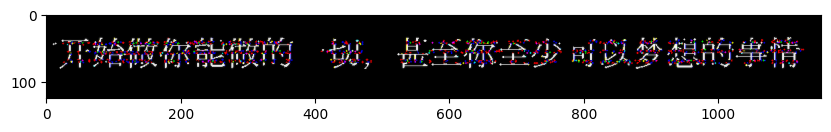

In [73]:
plt.figure(figsize=(10, 70))
plt.imshow(dog, 'gray', vmin=0, vmax=255)